<a href="https://colab.research.google.com/github/Nicholas-0/ResNet-34-CNN-TensorFlow/blob/master/ResNet_34_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
class ResidualUnit(keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
                        keras.layers.Conv2D(filters, 3, strides=strides,
                                            padding="same", use_bias=False),
                        keras.layers.BatchNormalization(),
                        self.activation,
                        keras.layers.Conv2D(filters, 3, strides=1,
                                            padding="same", use_bias=False),
                        keras.layers.BatchNormalization()]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
                          keras.layers.Conv2D(filters, 1, strides=strides,
                                              padding="same", use_bias=False),
                          keras.layers.BatchNormalization()]
  
  def call(self, inputs):
    X = inputs
    for layer in self.main_layers:
      X = layer(X)
    skip_X = inputs
    for layer in self.skip_layers:
      skip_X = layer(skip_X)
    return self.activation(X + skip_X)

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3], # Images input shape here
                              padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
previous_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  strides = 1 if filters == previous_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  previous_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax")) # Number of classes here

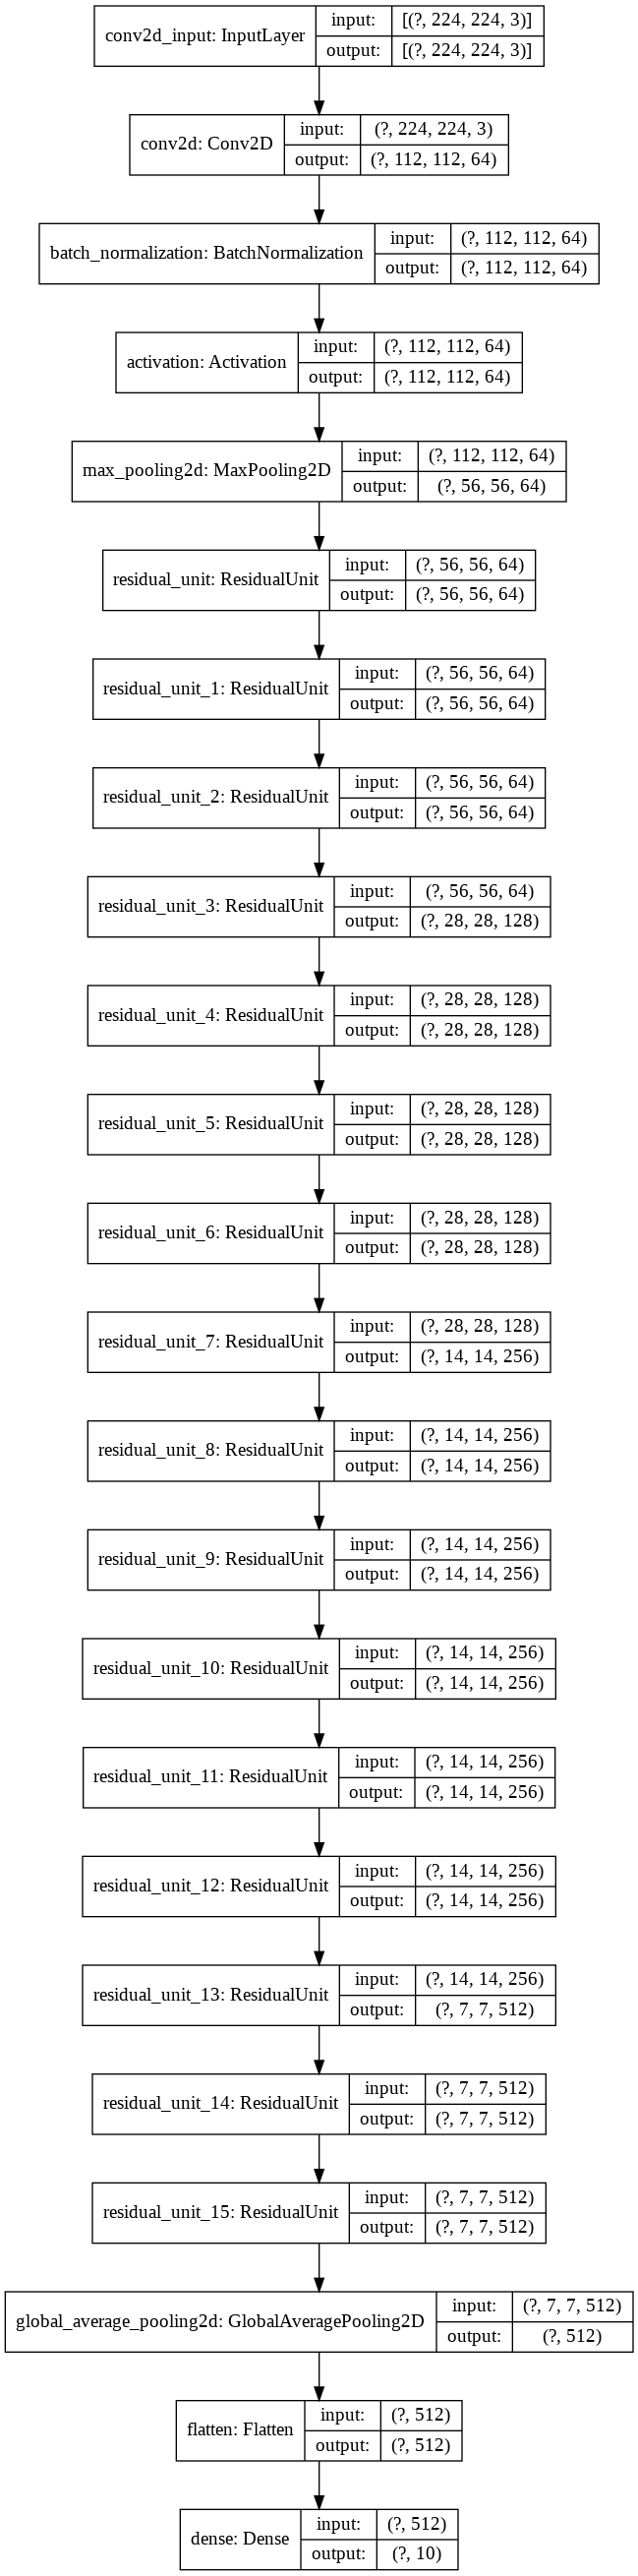

In [4]:
keras.utils.plot_model(model, show_shapes=True)